<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_16_Data_Visualization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-12-08 00:20:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.3’

survey-data.csv.3   100%[===================>] 152.13M   113MB/s    in 1.3s    

2025-12-08 00:20:29 (113 MB/s) - ‘survey-data.csv.3’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*)
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


# **Step 0 - Cleaning and preparing the data**

In [10]:
# CLEANING AND PREPPING

# Select the whole db
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [11]:
# Create copy
df_clean = df.copy()

In [12]:
# Create a clean working df from the db
QUERY = """
SELECT
    MainBranch,
    Age,
    WorkExp,
    TimeSearching,
    TimeAnswering,
    CompTotal,
    Frustration,
    DatabaseWantToWorkWith
FROM main
"""
df_clean = pd.read_sql_query(QUERY, conn)
print("Shape:", df_clean.shape)
df_clean.head(10)

Shape: (65437, 8)


,MainBranch,Age,WorkExp,TimeSearching,TimeAnswering,CompTotal,Frustration,DatabaseWantToWorkWith
0,I am a developer by profession,Under 18 years old,NaN,None,None,NaN,None,None
1,I am a developer by profession,35-44 years old,17.0,None,None,NaN,None,PostgreSQL
2,I am a developer by profession,45-54 years old,NaN,None,None,NaN,None,Firebase Realtime Database
3,I am learning to code,18-24 years old,NaN,None,None,NaN,None,MongoDB;MySQL;PostgreSQL
4,I am a developer by profession,18-24 years old,NaN,None,None,NaN,None,PostgreSQL;SQLite
5,I code primarily as a hobby,Under 18 years old,NaN,None,None,NaN,None,Cloud Firestore
6,"I am not primarily a developer, but I write co...",35-44 years old,NaN,None,None,NaN,None,None
7,I am learning to code,18-24 years old,NaN,None,None,NaN,None,Supabase
8,I code primarily as a hobby,45-54 years old,NaN,None,None,NaN,None,None
9,I am a developer by profession,35-44 years old,NaN,None,None,NaN,None,MongoDB;MySQL;PostgreSQL;Redis


In [13]:
# CLEANING AND PREPPING THE AGE COLUMN
# Unique values (20)
df_clean['Age'].unique()[:20]

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [14]:
df_clean['Age'].nunique()

8

In [15]:
df_clean['Age'].value_counts(dropna=False)

,count
Age,
25-34 years old,23911
35-44 years old,14942
18-24 years old,14098
45-54 years old,6249
55-64 years old,2575
Under 18 years old,2568
65 years or older,772
Prefer not to say,322


In [16]:
# Clean  and Convert Age categories
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

# Create numeric Age ci=olumn ( AgeNum )
df_clean['AgeNum'] = df_clean['Age'].map(age_map)

# Median of mapped ages
age_median = df_clean["AgeNum"].median()
df_clean["AgeNum"] = df_clean["AgeNum"].fillna(age_median)

In [17]:
# Quick Checks
print(df_clean[["Age", "AgeNum"]].head(15))
print("\nAgeNum summary:")
print(df_clean["AgeNum"].describe())
print("\nUnique AgeNum values:", sorted(df_clean["AgeNum"].unique()))

                   Age  AgeNum
0   Under 18 years old    17.0
1      35-44 years old    40.0
2      45-54 years old    50.0
3      18-24 years old    21.0
4      18-24 years old    21.0
5   Under 18 years old    17.0
6      35-44 years old    40.0
7      18-24 years old    21.0
8      45-54 years old    50.0
9      35-44 years old    40.0
10     35-44 years old    40.0
11     45-54 years old    50.0
12     35-44 years old    40.0
13     35-44 years old    40.0
14     25-34 years old    30.0

AgeNum summary:
count    65437.000000
mean        33.396610
std         11.308086
min         17.000000
25%         21.000000
50%         30.000000
75%         40.000000
max         70.000000
Name: AgeNum, dtype: float64

Unique AgeNum values: [np.float64(17.0), np.float64(21.0), np.float64(30.0), np.float64(40.0), np.float64(50.0), np.float64(60.0), np.float64(70.0)]


In [18]:
# CLEANING AND PREPPING THE WORKEXP COLUMN
# Column Raw form
df_clean['WorkExp'].value_counts(dropna=False)

,count
WorkExp,
NaN,35779
3.0,2144
5.0,2050
10.0,2029
2.0,1885
4.0,1767
6.0,1600
7.0,1581
8.0,1554


In [19]:
# Cleaning function for missing WorkExp
import numpy as np

def infer_workexp_from_age(age_num):
  """
  Infer realistic work experience based on age group.
  Uses AgeNum (numeric midpoint) created earlier.
  """
  if age_num <=21:
      return 1 # student or very early career
  elif age_num <=30:
      return 3 # early career
  elif age_num <=40:
      return 8 # mid career
  elif age_num <=50:
      return 15 #senior
  elif age_num <=60:
      return 25 #veteran
  else:
    return 35 #65+ very long career

In [20]:
# Convert WorkExp to numeric explicitly
df_clean["WorkExp"] = pd.to_numeric(df_clean["WorkExp"], errors="coerce")

# Fill missing values using the age-based inference
df_clean["WorkExp"] = df_clean.apply(
    lambda row: infer_workexp_from_age(row["AgeNum"]) if pd.isna(row["WorkExp"]) else row["WorkExp"], axis=1
)

In [21]:
# Check results
print("Missing numbers:", df_clean["WorkExp"].isna().sum())
print("\nColumn description", "\n", df_clean["WorkExp"].describe())
print("\n", df_clean[["Age", "AgeNum", "WorkExp"]].head(20))

Missing numbers: 0

Column description 
 count    65437.000000
mean         8.423827
std          8.576176
min          0.000000
25%          3.000000
50%          5.000000
75%         12.000000
max         50.000000
Name: WorkExp, dtype: float64

                    Age  AgeNum  WorkExp
0   Under 18 years old    17.0      1.0
1      35-44 years old    40.0     17.0
2      45-54 years old    50.0     15.0
3      18-24 years old    21.0      1.0
4      18-24 years old    21.0      1.0
5   Under 18 years old    17.0      1.0
6      35-44 years old    40.0      8.0
7      18-24 years old    21.0      1.0
8      45-54 years old    50.0     15.0
9      35-44 years old    40.0      8.0
10     35-44 years old    40.0     15.0
11     45-54 years old    50.0     15.0
12     35-44 years old    40.0     12.0
13     35-44 years old    40.0      8.0
14     25-34 years old    30.0      3.0
15     45-54 years old    50.0     29.0
16  Under 18 years old    17.0      1.0
17     18-24 years old    21.0 

In [22]:
print("WorkExp description", "\n", df_clean["WorkExp"].describe())
print("\nPrint Age, AgeNum and WorkExp columns", "\n", df_clean[["Age", "AgeNum", "WorkExp"]].head(15))
print("\nWorkExp first 15 rows", "\n", df_clean["WorkExp"].value_counts().head(15))

WorkExp description 
 count    65437.000000
mean         8.423827
std          8.576176
min          0.000000
25%          3.000000
50%          5.000000
75%         12.000000
max         50.000000
Name: WorkExp, dtype: float64

Print Age, AgeNum and WorkExp columns 
                    Age  AgeNum  WorkExp
0   Under 18 years old    17.0      1.0
1      35-44 years old    40.0     17.0
2      45-54 years old    50.0     15.0
3      18-24 years old    21.0      1.0
4      18-24 years old    21.0      1.0
5   Under 18 years old    17.0      1.0
6      35-44 years old    40.0      8.0
7      18-24 years old    21.0      1.0
8      45-54 years old    50.0     15.0
9      35-44 years old    40.0      8.0
10     35-44 years old    40.0     15.0
11     45-54 years old    50.0     15.0
12     35-44 years old    40.0     12.0
13     35-44 years old    40.0      8.0
14     25-34 years old    30.0      3.0

WorkExp first 15 rows 
 WorkExp
1.0     13760
3.0     13376
8.0      8330
15.0     4490
25

In [23]:
# CLEANING AND PREPPING THE TIMESEARCHING COLUMN
# Inspecting the TimeSearching column
df_clean["TimeSearching"].value_counts(dropna=False).head(50)

,count
TimeSearching,
None,36526
30-60 minutes a day,10951
15-30 minutes a day,7805
60-120 minutes a day,5275
Less than 15 minutes a day,2689
Over 120 minutes a day,2191


In [24]:
# Numeric mapping
time_searching_map = {
    "None": 0,
    "Less than 15 minutes a day": 7,
    "15-30 minutes a day": 22.5,
    "#0-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}

In [25]:
# Apply mapping - text categories to numeric minutes
df_clean["TimeSearchingNum"] = df_clean["TimeSearching"].map(time_searching_map)

# Any unexpected category = become NaN → fill with median
median_ts = df_clean["TimeSearchingNum"].median()
df_clean["TimeSearchingNum"] = df_clean["TimeSearchingNum"].fillna(median_ts)

# Check results
df_clean[["TimeSearching", "TimeSearchingNum"]].head(15)
print(df_clean["TimeSearchingNum"].describe())

count    65437.000000
mean        31.573391
std         28.968054
min          7.000000
25%         22.500000
50%         22.500000
75%         22.500000
max        150.000000
Name: TimeSearchingNum, dtype: float64


In [26]:
# CLEANING AND PREPPING TIMEANSWERING COLUMN
# Inspect
df_clean["TimeAnswering"].value_counts(dropna=False).head(50)

,count
TimeAnswering,
None,36593
15-30 minutes a day,9341
30-60 minutes a day,8642
Less than 15 minutes a day,5918
60-120 minutes a day,3704
Over 120 minutes a day,1239


In [27]:
# Numeric Mapping
time_answering_map = {
    "None": 0,
    "Less than 15 minutes a day": 7,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}


In [28]:
# Apply mapping - text categories to numeric minutes
df_clean["TimeAnsweringNum"] = df_clean["TimeAnswering"].map(time_answering_map)

# Any unexpected category becomes NaN → fill with median
median_ta = df_clean["TimeAnsweringNum"].median()
df_clean["TimeAnsweringNum"] = df_clean["TimeAnsweringNum"].fillna(median_ta)

# Check results
df_clean[["TimeAnswering", "TimeAnsweringNum"]].head(15)
print(df_clean["TimeAnsweringNum"].describe())

count    65437.000000
mean        30.304583
std         24.359510
min          7.000000
25%         22.500000
50%         22.500000
75%         22.500000
max        150.000000
Name: TimeAnsweringNum, dtype: float64


In [29]:
# CLEANING AND PREPPING FRUSTRATION COLUMN
# Inspect
df_clean.columns.tolist()


['MainBranch',
 'Age',
 'WorkExp',
 'TimeSearching',
 'TimeAnswering',
 'CompTotal',
 'Frustration',
 'DatabaseWantToWorkWith',
 'AgeNum',
 'TimeSearchingNum',
 'TimeAnsweringNum']

In [30]:
[col for col in df_clean.columns if "frust" in col.lower()]

['Frustration']

In [31]:
df_clean["Frustration"].value_counts(dropna=False).head(60)

,count
Frustration,
None,37186
None of these,2364
Amount of technical debt,2067
Amount of technical debt;Reliability of tools/systems used in work,831
Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build,666
Amount of technical debt;Tracking my work,556
Amount of technical debt;Patching/updating core components,549
Amount of technical debt;Complexity of tech stack for build,495
Amount of technical debt;Complexity of tech stack for deployment,454


In [32]:
# Split all frustrations into lists
df_clean["FrustrationList"] = (
    df_clean["Frustration"]
    .fillna("None")
    .apply(lambda x: [i.strip() for i in str(x).split(";") if i.strip() != ""])
)

In [33]:
# how many were selected
def clean_count(lst):
    if lst == ["None"] or lst == ["None of these"]:
        return 0
    return len(lst)

df_clean["FrustrationCount"] = df_clean["FrustrationList"].apply(clean_count)


In [34]:
# Expoloded df for category analysis
df_frustr_exploded = (
    df_clean[["FrustrationList"]]
    .explode("FrustrationList")
    .rename(columns={"FrustrationList": "FrustrationItem"})
)

# Remove None values
df_frustr_exploded = df_frustr_exploded[~df_frustr_exploded["FrustrationItem"].isin(["None", "None of these"])]

In [35]:
# Count top Frustrations
df_frustr_exploded["FrustrationItem"].value_counts().head(20)

,count
FrustrationItem,
Amount of technical debt,17614
Complexity of tech stack for build,9284
Complexity of tech stack for deployment,9132
Reliability of tools/systems used in work,8904
Tracking my work,7652
Patching/updating core components,7091
Number of software tools in use,6432
Showing my contributions,5546
Maintaining security of code being produced,5253


In [36]:
# Check results
df_clean[["Frustration", "FrustrationList", "FrustrationCount"]].head(50)

,Frustration,FrustrationList,FrustrationCount
0,None,[None],0
1,None,[None],0
2,None,[None],0
3,None,[None],0
4,None,[None],0
5,None,[None],0
6,None,[None],0
7,None,[None],0
8,None,[None],0
9,None,[None],0


In [37]:
df_frustr_exploded.head(10)

,FrustrationItem
10,Amount of technical debt
10,Number of software tools in use
10,Tracking my work
10,Showing my contributions
12,Amount of technical debt
12,Complexity of tech stack for deployment
15,Amount of technical debt
15,Complexity of tech stack for deployment
15,Complexity of tech stack for build
15,Maintaining security of code being produced


In [38]:
# CLEANING AND PREPPRING COMPTOTAL COLUMN
# Inspect - Summary statistics
df_clean["CompTotal"].describe()

,CompTotal
count,3.374000e+04
mean,2.963841e+145
std,5.444117e+147
min,0.000000e+00
25%,6.000000e+04
50%,1.100000e+05
75%,2.500000e+05
max,1.000000e+150


In [39]:
# Missing values
df_clean["CompTotal"].isna().sum()

np.int64(31697)

In [40]:
# Most common value
df_clean["CompTotal"].value_counts().head(20)

,count
CompTotal,
100000.0,939
60000.0,839
120000.0,793
80000.0,728
50000.0,705
150000.0,660
70000.0,624
200000.0,608
90000.0,558


In [41]:
# Actual raw values
df_clean["CompTotal"].sort_values(ascending=False).head(50)

,CompTotal
14354,1.000000e+150
34278,1.000000e+65
17374,1.000000e+53
8814,1.000000e+44
20037,8.000000e+27
24677,1.000000e+20
27268,1.111111e+15
52485,3.040302e+14
46992,7.587459e+13
59887,7.777778e+12


In [42]:
# Filter out obviously corrupted values
df_clean[df_clean["CompTotal"] > 2_000_000].head(20)

,MainBranch,Age,WorkExp,TimeSearching,TimeAnswering,CompTotal,Frustration,DatabaseWantToWorkWith,AgeNum,TimeSearchingNum,TimeAnsweringNum,FrustrationList,FrustrationCount
72,I am a developer by profession,18-24 years old,3.0,30-60 minutes a day,60-120 minutes a day,2.040000e+06,Amount of technical debt;Number of software to...,BigQuery;Cassandra;Databricks SQL;Elasticsearc...,21.0,22.5,90.0,"[Amount of technical debt, Number of software ...",6
472,I am a developer by profession,25-34 years old,9.0,60-120 minutes a day,60-120 minutes a day,9.000000e+09,Showing my contributions;Complexity of tech st...,Elasticsearch;PostgreSQL;SQLite,30.0,90.0,90.0,"[Showing my contributions, Complexity of tech ...",4
488,I am a developer by profession,35-44 years old,14.0,30-60 minutes a day,15-30 minutes a day,6.000000e+06,Amount of technical debt;Complexity of tech st...,PostgreSQL,40.0,22.5,22.5,"[Amount of technical debt, Complexity of tech ...",4
500,"I am not primarily a developer, but I write co...",35-44 years old,8.0,None,None,4.000000e+06,None,None,40.0,22.5,22.5,[None],0
623,"I am not primarily a developer, but I write co...",35-44 years old,8.0,None,None,1.000000e+11,None,PostgreSQL,40.0,22.5,22.5,[None],0
665,I am a developer by profession,25-34 years old,11.0,Less than 15 minutes a day,60-120 minutes a day,4.000000e+06,Amount of technical debt,MongoDB;PostgreSQL,30.0,7.0,90.0,[Amount of technical debt],1
682,I am a developer by profession,45-54 years old,24.0,15-30 minutes a day,15-30 minutes a day,5.000000e+06,None of these,SQLite,50.0,22.5,22.5,[None of these],0
695,"I am not primarily a developer, but I write co...",25-34 years old,12.0,Less than 15 minutes a day,None,3.600000e+06,Reliability of tools/systems used in work,None,30.0,7.0,22.5,[Reliability of tools/systems used in work],1
707,I am a developer by profession,35-44 years old,10.0,30-60 minutes a day,30-60 minutes a day,8.000000e+06,Amount of technical debt;Number of software to...,None,40.0,22.5,45.0,"[Amount of technical debt, Number of software ...",5
825,I am a developer by profession,25-34 years old,4.0,15-30 minutes a day,None,3.500000e+06,Amount of technical debt;Maintaining security ...,MySQL;Redis,30.0,22.5,22.5,"[Amount of technical debt, Maintaining securit...",2


In [43]:
df_clean[df_clean["CompTotal"] < 0].head(20)

,MainBranch,Age,WorkExp,TimeSearching,TimeAnswering,CompTotal,Frustration,DatabaseWantToWorkWith,AgeNum,TimeSearchingNum,TimeAnsweringNum,FrustrationList,FrustrationCount


In [44]:
# Check amount corrupted rows
invalid_high = df_clean[df_clean["CompTotal"] > 2_000_000].shape[0]
invalid_low = df_clean[df_clean["CompTotal"] < 0].shape[0]
invalid_high, invalid_low

(2428, 0)

In [45]:
# Remove impossible or corrupted values
df_clean["CompTotalClean"] = df_clean["CompTotal"].copy()

df_clean.loc[
    (df_clean["CompTotalClean"] > 1_000_000) |
    (df_clean["CompTotalClean"] <= 0),
    "CompTotalClean"
] = np.nan

In [46]:
# Check invalid rows
df_clean["CompTotalClean"].isna().sum()

np.int64(35596)

In [47]:
# Replace missing with median salary
median_salary = df_clean["CompTotalClean"].median()
df_clean["CompTotalClean"] = df_clean["CompTotalClean"].fillna(median_salary)

In [48]:
df_clean.loc[df_clean["CompTotalClean"] < 5000, "CompTotalClean"] = median_salary

In [49]:
# Check results
df_clean["CompTotalClean"].describe()

,CompTotalClean
count,65437.000000
mean,127125.703195
std,134214.348375
min,5000.000000
25%,96000.000000
50%,96000.000000
75%,96000.000000
max,1000000.000000


In [50]:
df_clean["CompTotalClean"].value_counts().head(20)

,count
CompTotalClean,
96000.0,36219
100000.0,939
60000.0,839
120000.0,793
80000.0,728
50000.0,705
150000.0,660
70000.0,624
200000.0,608


In [51]:
# CLEANING AND PREPPING DATABASEWANTTOWORKWITH COLUMN
# Inspect
df_clean["DatabaseWantToWorkWith"].value_counts(dropna=False).head(20)

,count
DatabaseWantToWorkWith,
None,22879
PostgreSQL,3738
PostgreSQL;SQLite,1533
SQLite,1476
Microsoft SQL Server,1431
MySQL,1139
MongoDB,917
PostgreSQL;Redis,855
MongoDB;PostgreSQL,600


In [52]:
# New db
df_clean["DatabaseWantList"] = (
    df_clean["DatabaseWantToWorkWith"]
    .fillna("None")
    .apply(lambda x: [i.strip() for i in str(x).split(";") if i.strip() != ""])
)

In [53]:
# Explode db
df_db_exploded = (
    df_clean[["DatabaseWantList"]]
    .explode("DatabaseWantList")
    .rename(columns={"DatabaseWantList": "DatabaseWant"})
)

In [54]:
# Remove NONE
df_db_exploded = df_db_exploded[df_db_exploded["DatabaseWant"] != "None"]

In [55]:
# Count top databases
top_databases = df_db_exploded["DatabaseWant"].value_counts().head(10)
top_databases

,count
DatabaseWant,
PostgreSQL,24005
SQLite,13489
MySQL,12269
MongoDB,10982
Redis,10847
Microsoft SQL Server,7905
Elasticsearch,6246
MariaDB,5947
Dynamodb,3503


In [56]:
top5 = df_db_exploded["DatabaseWant"].value_counts().head(5)
top5

,count
DatabaseWant,
PostgreSQL,24005
SQLite,13489
MySQL,12269
MongoDB,10982
Redis,10847


In [57]:
top5_databases = df_db_exploded["DatabaseWant"].value_counts().head(5)
top5_databases

,count
DatabaseWant,
PostgreSQL,24005
SQLite,13489
MySQL,12269
MongoDB,10982
Redis,10847


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


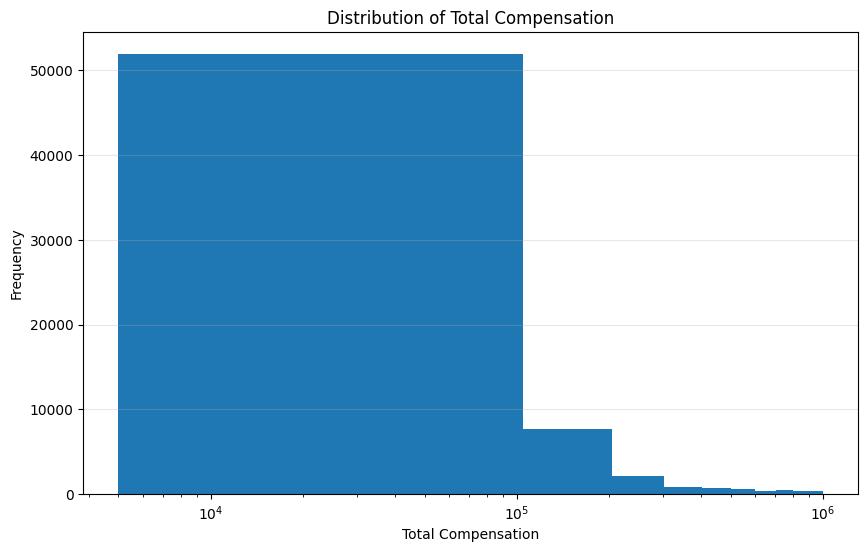

In [58]:
## Write your code here
plt.figure(figsize=(10,6))

plt.hist(df_clean["CompTotalClean"], log=False)
plt.xscale("log")

plt.title("Distribution of Total Compensation")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")

plt.grid(axis="y", alpha=0.3)
plt.show()

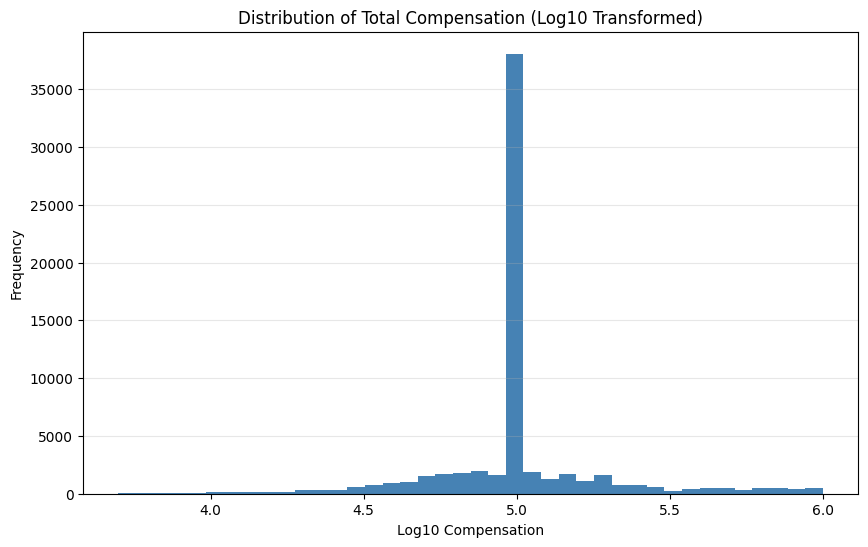

In [59]:
import numpy as np
plt.figure(figsize=(10,6))

# Create a log-transformed column (adding 1 prevents log(0))
df_clean["CompLog"] = np.log10(df_clean["CompTotalClean"] + 1)

plt.hist(df_clean["CompLog"], bins=40, color="steelblue")

plt.title("Distribution of Total Compensation (Log10 Transformed)")
plt.xlabel("Log10 Compensation")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)

plt.show()


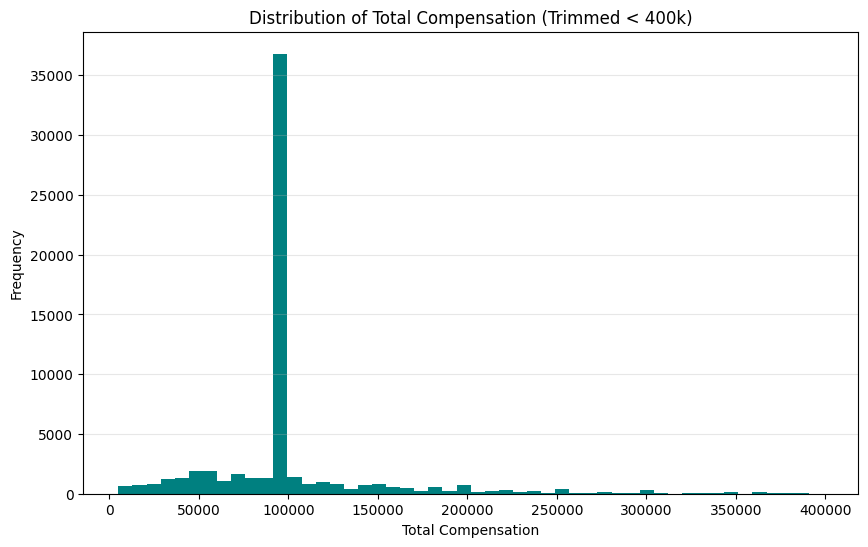

In [60]:
plt.figure(figsize=(10,6))

plt.hist(df_clean[df_clean["CompTotalClean"] < 400000]["CompTotalClean"],
         bins=50, color="teal")

plt.title("Distribution of Total Compensation (Trimmed < 400k)")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)

plt.show()


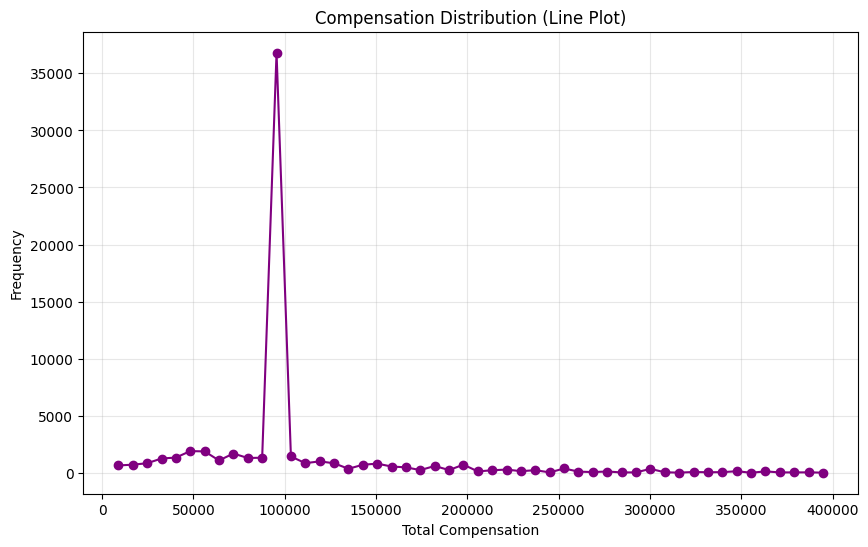

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Use trimmed compensation
data = df_clean[df_clean["CompTotalClean"] < 400000]["CompTotalClean"]

# Create histogram bins manually
counts, bin_edges = np.histogram(data, bins=50)

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(10,6))
plt.plot(bin_centers, counts, marker="o", linestyle="-", color="purple")

plt.title("Compensation Distribution (Line Plot)")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)

plt.show()


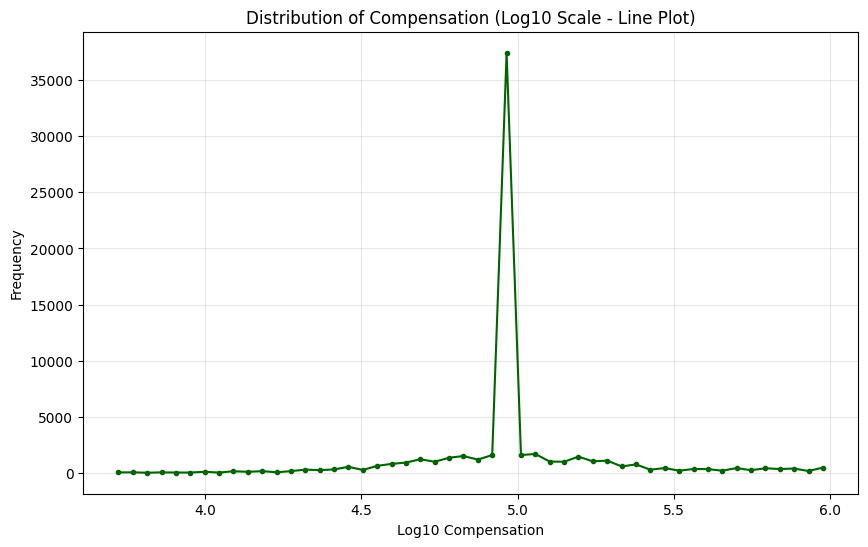

In [62]:
data_log = np.log10(df_clean["CompTotalClean"])

counts, bin_edges = np.histogram(data_log, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(10,6))
plt.plot(bin_centers, counts, marker=".", color="darkgreen")

plt.title("Distribution of Compensation (Log10 Scale - Line Plot)")
plt.xlabel("Log10 Compensation")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)

plt.show()


In [63]:
data_trimmed = df_clean[df_clean["CompTotalClean"] != 96000]["CompTotalClean"]


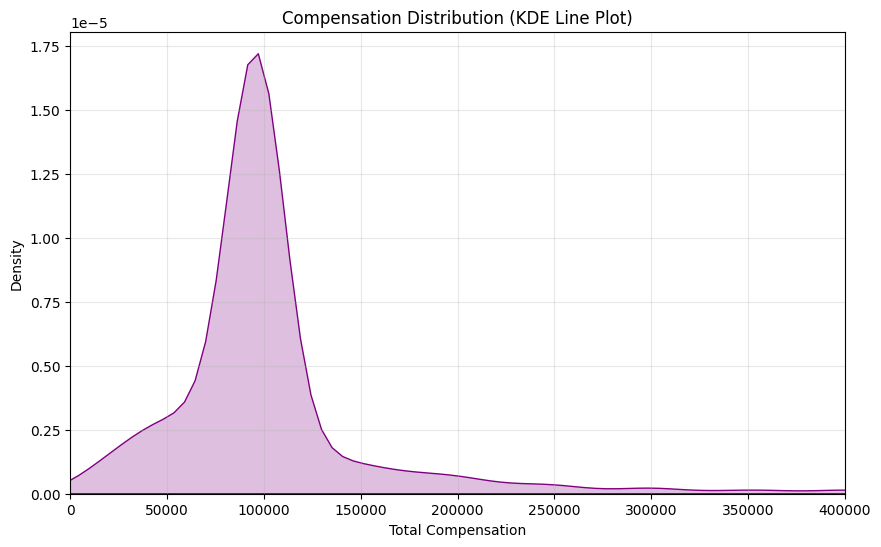

In [64]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(df_clean["CompTotalClean"], fill=True, color="purple", bw_adjust=1)
plt.xlim(0, 400000)
plt.title("Compensation Distribution (KDE Line Plot)")
plt.xlabel("Total Compensation")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.show()


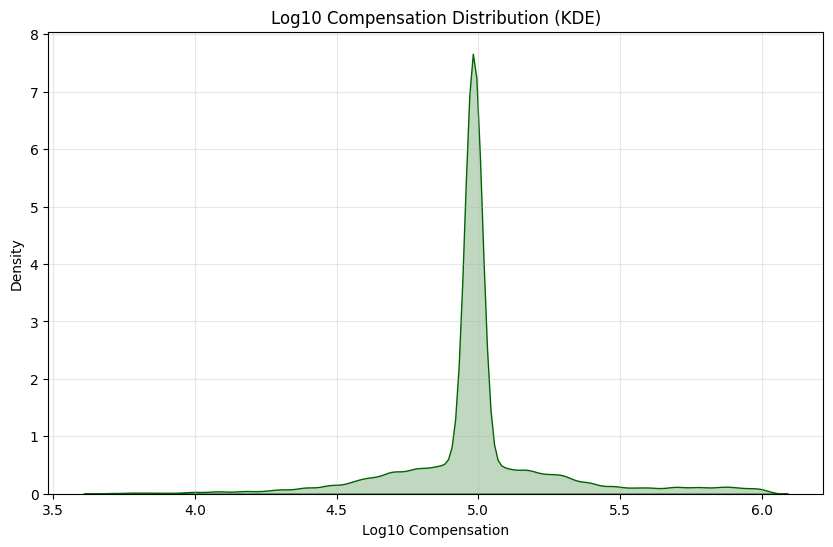

In [65]:
plt.figure(figsize=(10,6))
sns.kdeplot(np.log10(df_clean["CompTotalClean"]), fill=True, color="darkgreen", bw_adjust=1)
plt.title("Log10 Compensation Distribution (KDE)")
plt.xlabel("Log10 Compensation")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.show()


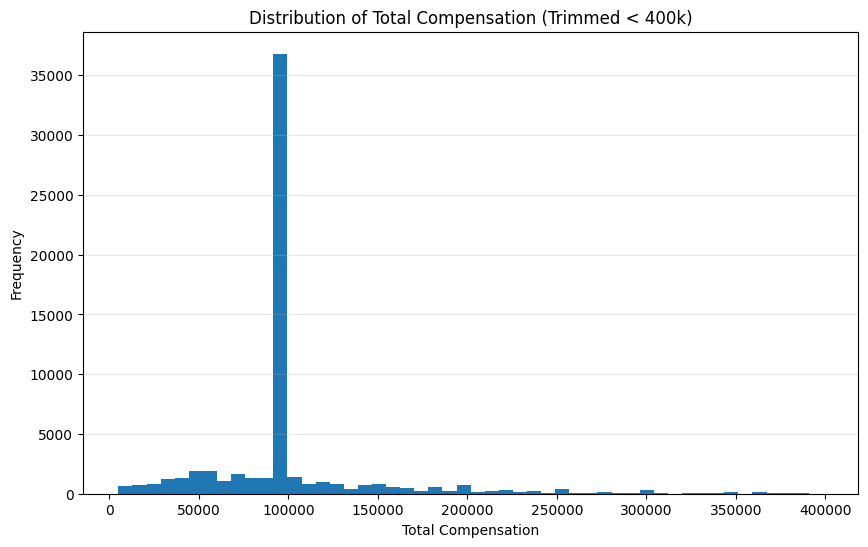

In [66]:
plt.figure(figsize=(10,6))

data_trim = df_clean[df_clean["CompTotalClean"] < 400000]["CompTotalClean"]

plt.hist(data_trim, bins=50)

plt.title("Distribution of Total Compensation (Trimmed < 400k)")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)

plt.show()


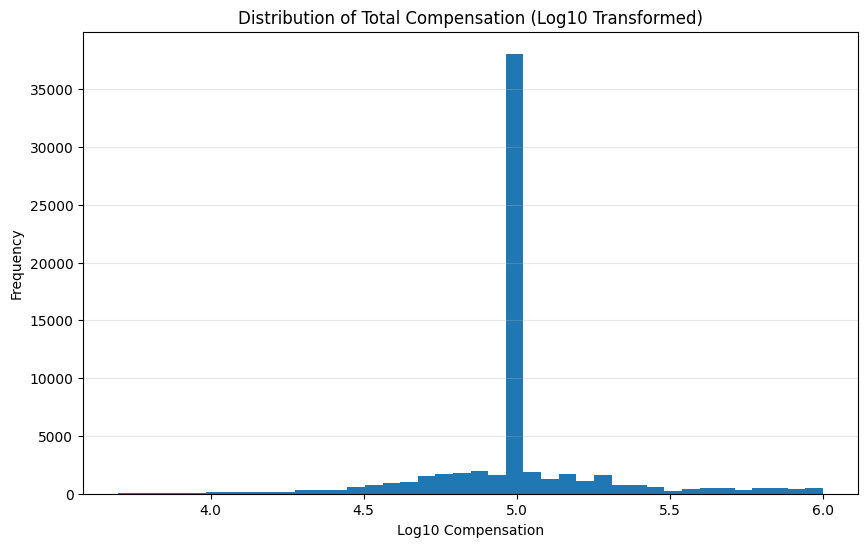

In [67]:
plt.figure(figsize=(10,6))

comp_log = np.log10(df_clean["CompTotalClean"])

plt.hist(comp_log, bins=40)

plt.title("Distribution of Total Compensation (Log10 Transformed)")
plt.xlabel("Log10 Compensation")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)

plt.show()


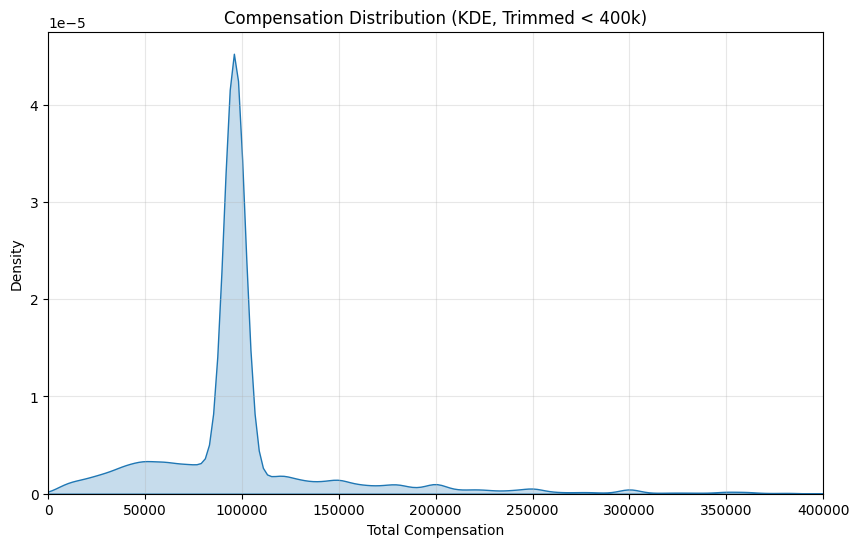

In [68]:
plt.figure(figsize=(10,6))

sns.kdeplot(
    data=df_clean[df_clean["CompTotalClean"] < 400000]["CompTotalClean"],
    fill=True
)

plt.title("Compensation Distribution (KDE, Trimmed < 400k)")
plt.xlabel("Total Compensation")
plt.ylabel("Density")
plt.xlim(0, 400000)
plt.grid(alpha=0.3)

plt.show()


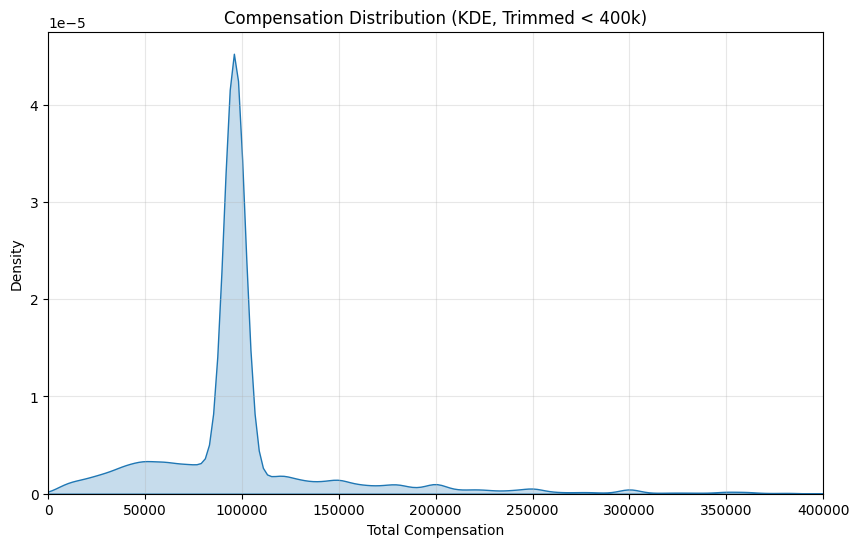

In [69]:
plt.figure(figsize=(10,6))

sns.kdeplot(
    data=df_clean[df_clean["CompTotalClean"] < 400000]["CompTotalClean"],
    fill=True
)

plt.title("Compensation Distribution (KDE, Trimmed < 400k)")
plt.xlabel("Total Compensation")
plt.ylabel("Density")
plt.xlim(0, 400000)
plt.grid(alpha=0.3)

plt.show()


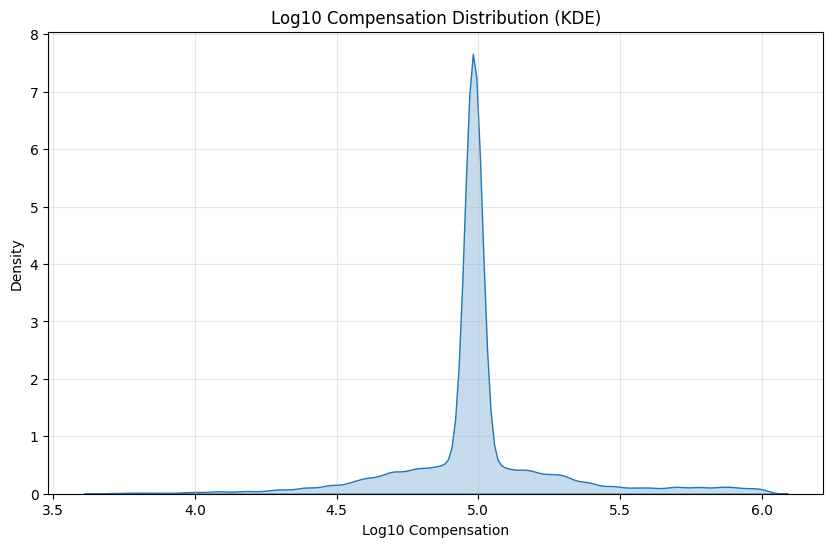

In [70]:
plt.figure(figsize=(10,6))

sns.kdeplot(
    data=np.log10(df_clean["CompTotalClean"]),
    fill=True
)

plt.title("Log10 Compensation Distribution (KDE)")
plt.xlabel("Log10 Compensation")
plt.ylabel("Density")
plt.grid(alpha=0.3)

plt.show()


**Box Plots**

Plot a box plot of Age.


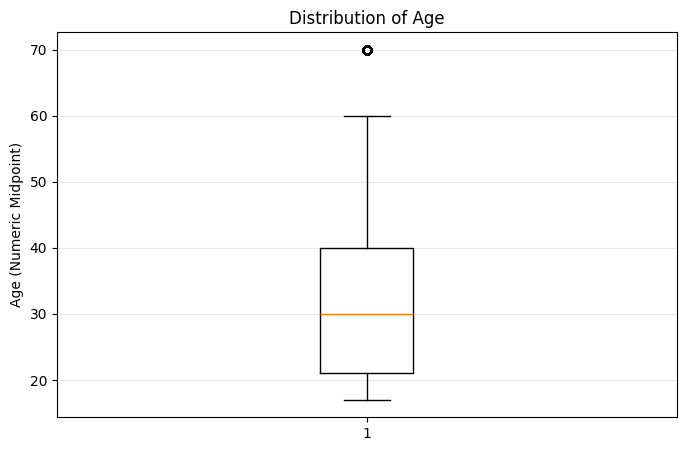

In [71]:
## Write your code here
df_clean["AgeNum"]

plt.figure(figsize=(8,5))

plt.boxplot(df_clean["AgeNum"], vert=True)

plt.title("Distribution of Age")
plt.ylabel("Age (Numeric Midpoint)")

plt.grid(axis="y", alpha=0.3)

plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [80]:
## Write your code here
df_clean["WorkExp"].describe()

,WorkExp
count,65437.000000
mean,8.423827
std,8.576176
min,0.000000
25%,3.000000
50%,5.000000
75%,12.000000
max,50.000000


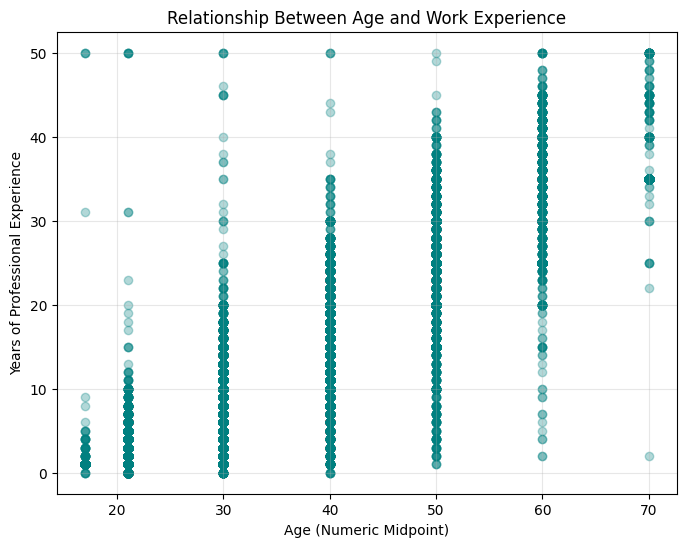

In [81]:
plt.figure(figsize=(8,6))

plt.scatter(df_clean["AgeNum"], df_clean["WorkExp"], alpha=0.3, color="teal")

plt.title("Relationship Between Age and Work Experience")
plt.xlabel("Age (Numeric Midpoint)")
plt.ylabel("Years of Professional Experience")

plt.grid(alpha=0.3)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [84]:
## Write your code here
df_clean[["TimeSearchingNum", "TimeAnsweringNum", "AgeNum"]].head()


,TimeSearchingNum,TimeAnsweringNum,AgeNum
0,22.5,22.5,17.0
1,22.5,22.5,40.0
2,22.5,22.5,50.0
3,22.5,22.5,21.0
4,22.5,22.5,21.0


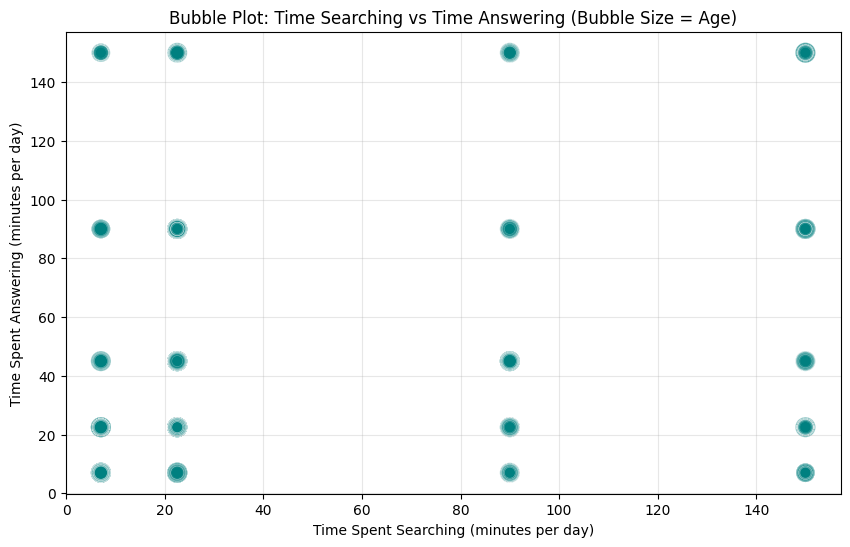

In [85]:
plt.figure(figsize=(10,6))

plt.scatter(
    df_clean["TimeSearchingNum"],
    df_clean["TimeAnsweringNum"],
    s=df_clean["AgeNum"] * 3,     # bubble size scaled for visibility
    alpha=0.3,
    color="teal",
    edgecolors="white",
    linewidth=0.5
)

plt.title("Bubble Plot: Time Searching vs Time Answering (Bubble Size = Age)")
plt.xlabel("Time Spent Searching (minutes per day)")
plt.ylabel("Time Spent Answering (minutes per day)")

plt.grid(alpha=0.3)
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


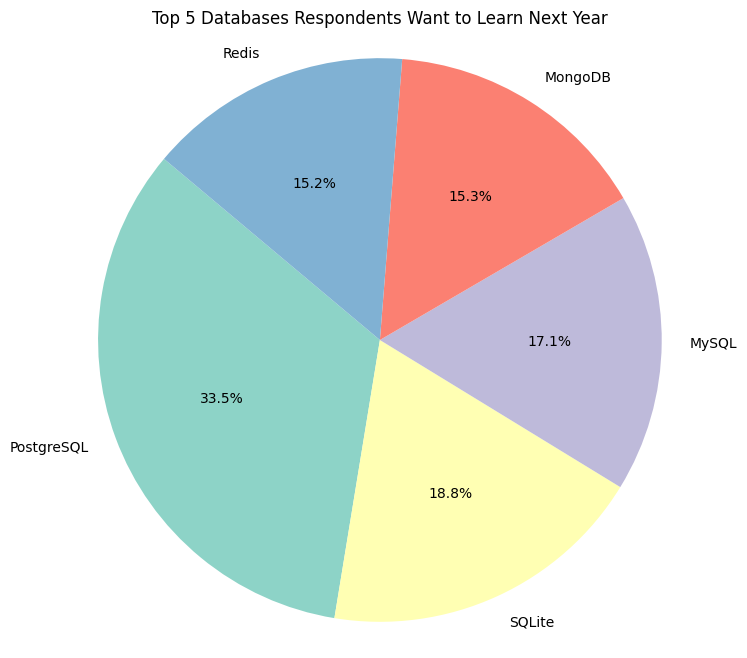

In [86]:
## Write your code here
plt.figure(figsize=(8,8))

plt.pie(
    top5_databases.values,
    labels=top5_databases.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Set3.colors
)

plt.title("Top 5 Databases Respondents Want to Learn Next Year")
plt.axis("equal")  # ensures pie is a circle
plt.show()

**Stacked Charts**

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [89]:
## Write your code here
age_group = df_clean[df_clean["AgeNum"] == 30]


In [90]:
median_search = age_group["TimeSearchingNum"].median()
median_answer = age_group["TimeAnsweringNum"].median()

median_search, median_answer


(22.5, 22.5)

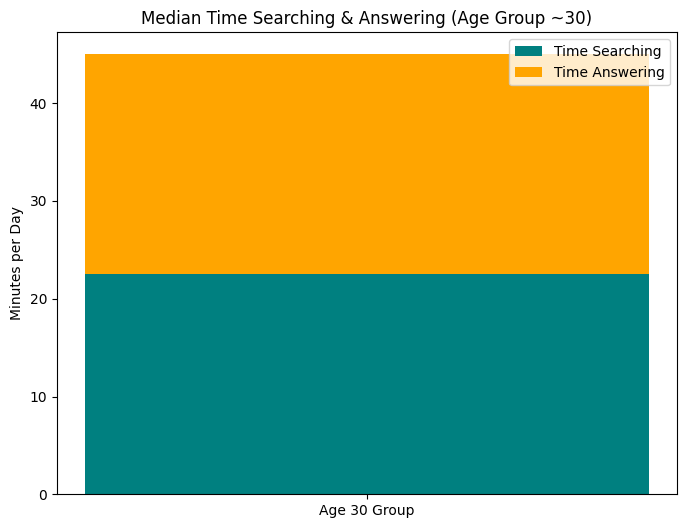

In [91]:
plt.figure(figsize=(8,6))

# Data for stacked bar
labels = ["Age 30 Group"]
search_values = [median_search]
answer_values = [median_answer]

plt.bar(labels, search_values, label="Time Searching", color="teal")
plt.bar(labels, answer_values, bottom=search_values, label="Time Answering", color="orange")

plt.title("Median Time Searching & Answering (Age Group ~30)")
plt.ylabel("Minutes per Day")
plt.legend()

plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [92]:
## Write your code here
age_range = [50, 60]

medians = (
    df_clean[df_clean["AgeNum"].isin(age_range)]
    .groupby("AgeNum")["CompTotalClean"]
    .median()
)
medians


,CompTotalClean
AgeNum,
50.0,96000.0
60.0,96000.0


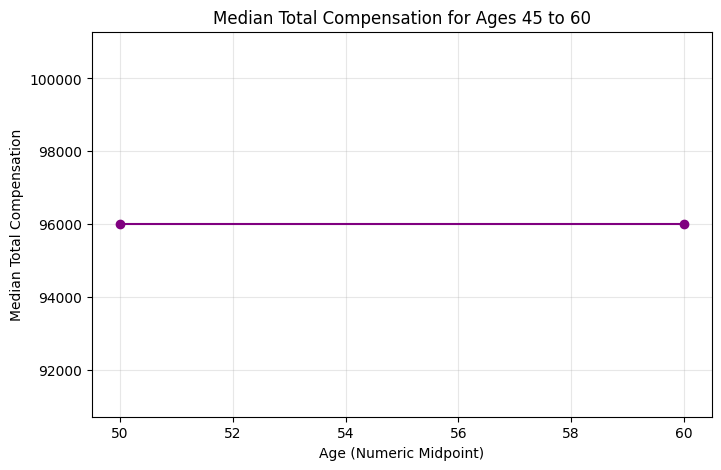

In [93]:
plt.figure(figsize=(8,5))

plt.plot(
    medians.index,
    medians.values,
    marker="o",
    linestyle="-",
    color="purple"
)

plt.title("Median Total Compensation for Ages 45 to 60")
plt.xlabel("Age (Numeric Midpoint)")
plt.ylabel("Median Total Compensation")
plt.grid(alpha=0.3)

plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [94]:
## Write your code here
mainbranch_counts = df_clean["MainBranch"].value_counts()
mainbranch_counts


,count
MainBranch,
I am a developer by profession,50207
"I am not primarily a developer, but I write code sometimes as part of my work/studies",6511
I am learning to code,3875
I code primarily as a hobby,3334
"I used to be a developer by profession, but no longer am",1510


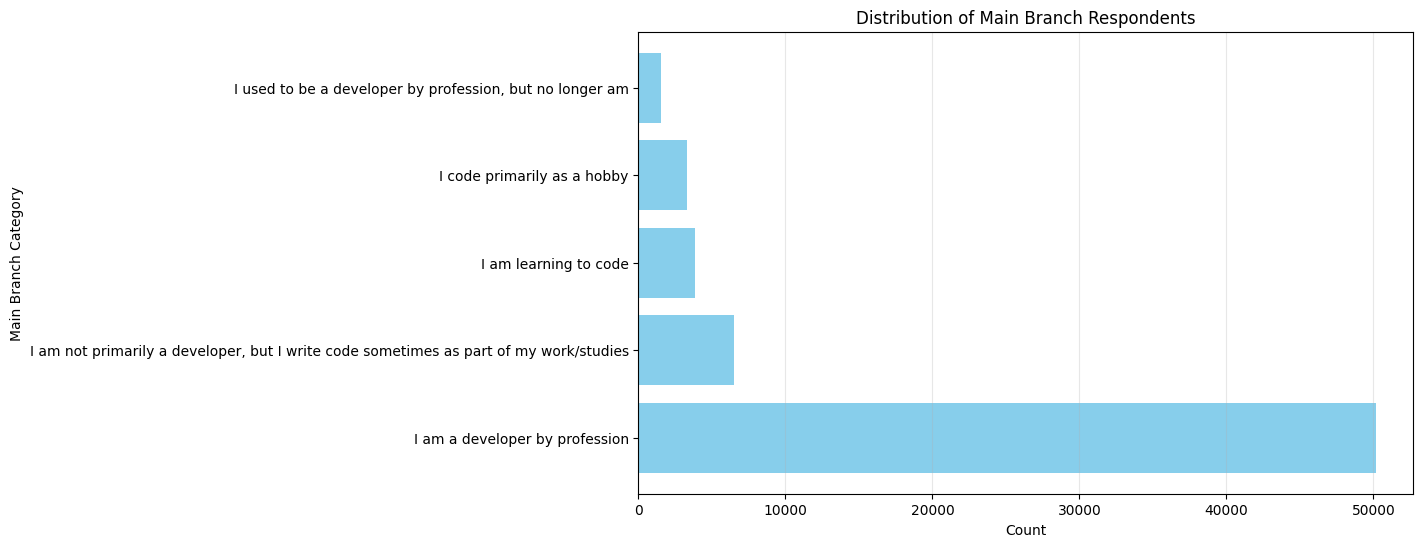

In [95]:
plt.figure(figsize=(10,6))

plt.barh(mainbranch_counts.index, mainbranch_counts.values, color="skyblue")

plt.title("Distribution of Main Branch Respondents")
plt.xlabel("Count")
plt.ylabel("Main Branch Category")

plt.grid(axis="x", alpha=0.3)
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [96]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
